In [1]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm.notebook import tqdm

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from scipy.stats import sem

In [2]:
ecoli = pd.read_csv('../data/ProtT5_embeddings/Ecoli_preprocessed.csv', index_col=0)
print("%d sequences in E. Coli proteome" % len(ecoli))

athali = pd.read_csv('../data/ProtT5_embeddings/Athaliana_preprocessed.csv', index_col=0)
print("%d sequences in A. thaliana proteome" % len(athali))

4403 sequences in E. Coli proteome
27448 sequences in A. thaliana proteome


In [3]:
specs = [ecoli.sample(frac=1).to_numpy(), athali.sample(frac=1).to_numpy()]

N_pairs = min([len(x) for x in specs])//2

X = np.vstack((specs[0][:2*N_pairs], specs[1][:2*N_pairs]))
y = np.array(['E. coli'] * (2*N_pairs) + ['A. thaliana']*2*N_pairs)

In [4]:
%%capture
u = UMAP()
emb = u.fit_transform(X)

In [5]:
df = pd.DataFrame({
    
    "UMAP1" : emb[:, 0],
    "UMAP2" : emb[:, 1],
    "Species" : y
    
}
)

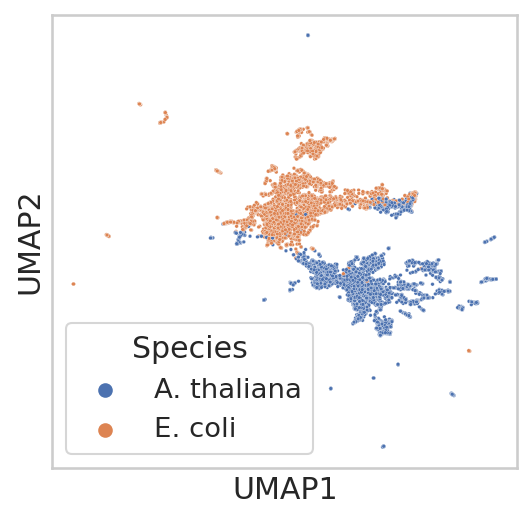

In [9]:
sns.set(style='whitegrid', font_scale=1.2)
rcParams['figure.figsize'] = (4,4)
rcParams['figure.dpi'] = 150
sns.scatterplot(df.sample(frac=1), x='UMAP1', y="UMAP2", hue="Species", s=3)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
N_trials = 100
scores = []
split = 0.5

for trial in tqdm(range(N_trials)):
    
    inds = np.arange(len(X))
    np.random.shuffle(inds)

    split_index = int(0.5*len(inds))
    
    trains = inds[:split_index]
    vals = inds[split_index:]
    
    clf = LogisticRegression(random_state=0, C=1).fit(X[trains], y[trains])

    scores.append(clf.score(X[vals], y[vals]))

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
print("Mean classification score: %f" %(np.mean(scores)))
print("SEM: %f" %(sem(scores)))

Mean classification score: 0.986913
SEM: 0.000132
